In [1]:
### Assignment2, for Question 2

In [2]:
# Importin Libraries

import pandas as pd # Data manipulation
import numpy as np # Matrix calculation
import geopandas as gpd # GIS of Pandas
import seaborn as sb # Parof of matplotlib for Data Viz
import matplotlib.pyplot as plt # data viz

In [3]:
# Defining Directories

directory_main = '/users//Myfam/Desktop/Python/Assignment_2/'
# RM - this is the df_final.csv created after merging df1 and df2 for Question1
directory_rm_df1 = directory_main + 'df_final.csv'
#GIS
directory_gis= directory_main + 'RuralMunicipality.shp'

In [4]:
# Reading RM

df_rm_df1=pd.read_csv(directory_rm_df1)
# Reading GIS
gdf_rm=gpd.read_file(directory_gis)

In [5]:
df_rm_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   RM      480 non-null    object
dtypes: object(1)
memory usage: 3.9+ KB


In [6]:
gdf_rm.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   PPID        298 non-null    object  
 1   EFFDT       298 non-null    object  
 2   EXPDT       0 non-null      object  
 3   FEATURECD   298 non-null    object  
 4   RMNO        298 non-null    object  
 5   RMNM        298 non-null    object  
 6   SHAPE_AREA  298 non-null    float64 
 7   SHAPE_LEN   298 non-null    float64 
 8   geometry    298 non-null    geometry
dtypes: float64(2), geometry(1), object(6)
memory usage: 21.1+ KB


<Axes: >

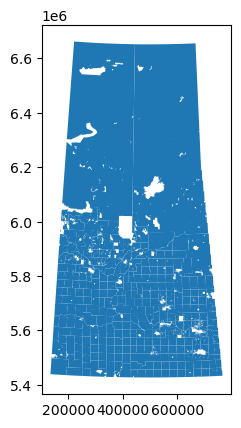

In [7]:
gdf_rm.plot() # good for GitHub

In [8]:
gdf_rm_revised=gdf_rm[['RMNO', 'RMNM', 'geometry', 'SHAPE_AREA']]

In [9]:
gdf_rm_revised

,RMNO,RMNM,geometry,SHAPE_AREA
0,095,GOLDEN WEST,"POLYGON ((654081.000 5546088.320, 654885.320 5...",8.101431e+08
1,378,ROSEMOUNT,"POLYGON ((265258.740 5810148.180, 266062.740 5...",5.844701e+08
2,288,PLEASANT VALLEY,"POLYGON ((254141.490 5701256.420, 254179.510 5...",8.532007e+08
3,106,WHISKA CREEK,"POLYGON ((339874.810 5539057.770, 339849.430 5...",8.526283e+08
4,132,HILLSBOROUGH,"POLYGON ((445175.620 5573313.600, 445572.880 5...",6.343913e+08
...,...,...,...,...
293,588,MEADOW LAKE,"MULTIPOLYGON (((307104.520 6003527.820, 307139...",5.922870e+09
294,352,HEART'S HILL,"POLYGON ((187054.680 5758478.840, 187005.860 5...",8.812504e+08
295,351,PROGRESS,"POLYGON ((209380.850 5785495.100, 209851.950 5...",8.441731e+08
296,520,PADDOCKWOOD,"MULTIPOLYGON (((451283.150 5981138.420, 451285...",2.408683e+09


In [10]:
# Chang CRS system to regular lon and lat
gdf_rm_revised=gdf_rm_revised.to_crs(4326)

In [11]:
gdf_rm_revised

,RMNO,RMNM,geometry,SHAPE_AREA
0,095,GOLDEN WEST,"POLYGON ((-102.84786 50.04713, -102.83663 50.0...",8.101431e+08
1,378,ROSEMOUNT,"POLYGON ((-108.45006 52.39118, -108.43824 52.3...",5.844701e+08
2,288,PLEASANT VALLEY,"POLYGON ((-108.53546 51.40915, -108.53547 51.4...",8.532007e+08
3,106,WHISKA CREEK,"POLYGON ((-107.23358 49.98235, -107.23360 49.9...",8.526283e+08
4,132,HILLSBOROUGH,"POLYGON ((-105.76996 50.30939, -105.76438 50.3...",6.343913e+08
...,...,...,...,...
293,588,MEADOW LAKE,"MULTIPOLYGON (((-107.95334 54.14359, -107.9533...",5.922870e+09
294,352,HEART'S HILL,"POLYGON ((-109.54844 51.88904, -109.54843 51.8...",8.812504e+08
295,351,PROGRESS,"POLYGON ((-109.24786 52.14336, -109.24097 52.1...",8.441731e+08
296,520,PADDOCKWOOD,"MULTIPOLYGON (((-105.74280 53.97629, -105.7427...",2.408683e+09


In [12]:
df_rm_df1

,RM
0,Winnipeg
1,Bifrost-riverton
2,Emerson-franklin
3,Rockwood
4,Armstrong
...,...
475,Special area 02
476,Special area 03
477,Special area 04
478,Spirit river


In [13]:
# Merging RM data with GIS
gdf_rm_final=pd.merge(gdf_rm_revised.rename(columns={'RMNO':'RM'}), df_rm_df1, on='RM', how='inner')
# looking at unique RM names for GIS data
gdf_rm_final['RM'].unique()

array(['378', '288', '106', '132', '335', '108', '367', '228', '107',
       '105', '467', '303', '426', '318', '310', '171', '245', '333',
       '337', '194', '135', '280', '292', '225', '458', '103', '226',
       '216', '133', '231', '141', '250', '104', '252', '110', '125',
       '162', '193', '305', '169', '336', '366', '470', '101', '304',
       '142', '349', '224', '128', '131', '134', '109', '274', '111',
       '405', '160', '379', '371', '185', '126', '164', '123', '124',
       '317', '222', '122', '165', '100', '320', '287', '395', '406',
       '401', '259', '308', '370', '340', '398', '129', '331', '247',
       '215', '402', '438', '219', '213', '431', '102', '472', '469',
       '261', '232', '130', '251', '521', '463', '464', '442', '214',
       '488', '190', '460', '307', '191', '230', '260', '466', '257',
       '136', '369', '497', '334', '277', '376', '429', '343', '493',
       '502', '246', '301', '151', '121', '138', '243', '241', '459',
       '486', '487',

In [14]:
# Change Object to Int
gdf_rm_final['RM']=gdf_rm_final['RM'].astype(int)

In [15]:
gdf_rm_final.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   RM          237 non-null    int32   
 1   RMNM        237 non-null    object  
 2   geometry    237 non-null    geometry
 3   SHAPE_AREA  237 non-null    float64 
dtypes: float64(1), geometry(1), int32(1), object(1)
memory usage: 6.6+ KB


<Axes: >

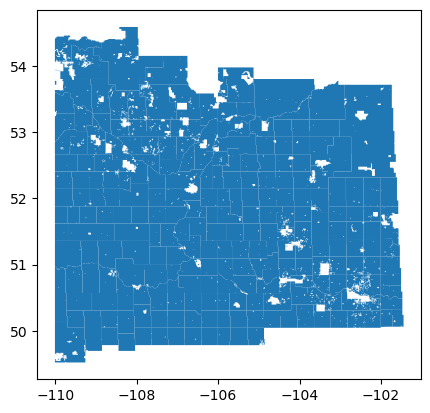

In [16]:
gdf_rm_final.plot() # for GitHub

In [17]:
print(gdf_rm_final)

      RM             RMNM                                           geometry  \
0    378        ROSEMOUNT  POLYGON ((-108.45006 52.39118, -108.43824 52.3...   
1    288  PLEASANT VALLEY  POLYGON ((-108.53546 51.40915, -108.53547 51.4...   
2    106     WHISKA CREEK  POLYGON ((-107.23358 49.98235, -107.23360 49.9...   
3    132     HILLSBOROUGH  POLYGON ((-105.76996 50.30939, -105.76438 50.3...   
4    335       HAZEL DELL  POLYGON ((-102.86307 52.07090, -102.86306 52.0...   
..   ...              ...                                                ...   
232  588      MEADOW LAKE  MULTIPOLYGON (((-107.95334 54.14359, -107.9533...   
233  352     HEART'S HILL  POLYGON ((-109.54844 51.88904, -109.54843 51.8...   
234  351         PROGRESS  POLYGON ((-109.24786 52.14336, -109.24097 52.1...   
235  520      PADDOCKWOOD  MULTIPOLYGON (((-105.74280 53.97629, -105.7427...   
236  491         BUCKLAND  POLYGON ((-105.91181 53.45244, -105.91180 53.4...   

       SHAPE_AREA  
0    5.844701e+08  

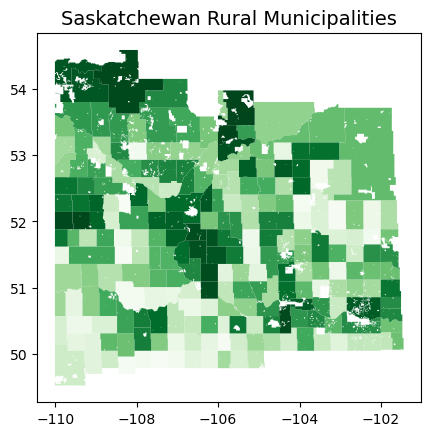

In [18]:
# Plot being displayed in GitHub
gdf_rm_final.plot(cmap='Greens', legend=False)
plt.title('Saskatchewan Rural Municipalities', color='black', size=14)
plt.xticks(color='black')
plt.yticks(color='black')
plt.show()

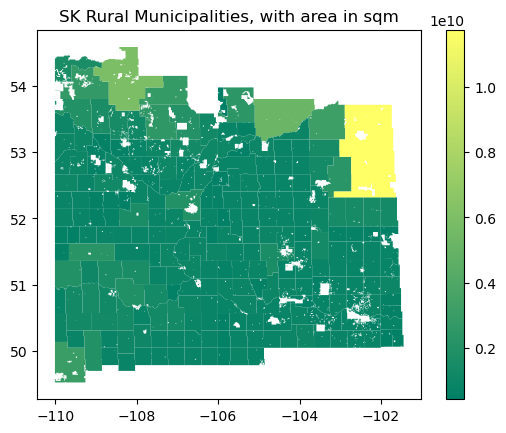

In [19]:
# Plot being displayed in GitHub
gdf_rm_final.plot('SHAPE_AREA', cmap='summer', legend=True)
plt.title('SK Rural Municipalities, with area in sqm', color='black', size=12)
plt.xticks(color='black')
plt.yticks(color='black')
plt.show()